# 6.1.4

In [1]:
# 6.1.4

# Create Latitude and Longitude Combinations


In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# 6.1.5

from citipy import citipy

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# removed print for API



In [12]:
# had to add this for the next line to work

coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


602

In [14]:
# 6.2.6
# Get the City Weather Data

In [15]:
# Import Dependencies, and Initialize an Empty List and Counters

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | inuvik
Processing Record 5 of Set 1 | mbalmayo
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | bafq
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | sistranda
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | vidim
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mildura
Processing Record 21 of Set 1 | serenje
Processing Record 22 of Set 1 | armacao de pera
Processing R

In [18]:
# should be len(city_data) I think

len(cities)

602

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,78.85,69,75,4.61,CK,2022-09-19 21:25:00
1,Lompoc,34.6391,-120.4579,69.01,96,100,11.01,US,2022-09-19 21:32:36
2,Nome,64.5011,-165.4064,45.10,81,100,9.22,US,2022-09-19 21:30:51
3,Inuvik,68.3499,-133.7218,54.36,50,20,6.91,CA,2022-09-19 21:32:38
4,Mbalmayo,3.5167,11.5000,66.09,98,92,2.86,CM,2022-09-19 21:32:38
5,Mahebourg,-20.4081,57.7000,70.25,78,20,11.50,MU,2022-09-19 21:25:52
6,Bafq,31.6128,55.4107,79.95,18,5,1.52,IR,2022-09-19 21:32:39
7,Mataura,-46.1927,168.8643,51.75,78,100,2.30,NZ,2022-09-19 21:25:47
8,Lata,40.1629,-8.3327,72.91,85,98,1.30,PT,2022-09-19 21:25:31
9,Sistranda,63.7256,8.8340,49.96,66,27,11.41,NO,2022-09-19 21:32:40


In [20]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-09-19 21:25:00,-21.2078,-159.7750,78.85,69,75,4.61
1,Lompoc,US,2022-09-19 21:32:36,34.6391,-120.4579,69.01,96,100,11.01
2,Nome,US,2022-09-19 21:30:51,64.5011,-165.4064,45.10,81,100,9.22
3,Inuvik,CA,2022-09-19 21:32:38,68.3499,-133.7218,54.36,50,20,6.91
4,Mbalmayo,CM,2022-09-19 21:32:38,3.5167,11.5000,66.09,98,92,2.86
5,Mahebourg,MU,2022-09-19 21:25:52,-20.4081,57.7000,70.25,78,20,11.50
6,Bafq,IR,2022-09-19 21:32:39,31.6128,55.4107,79.95,18,5,1.52
7,Mataura,NZ,2022-09-19 21:25:47,-46.1927,168.8643,51.75,78,100,2.30
8,Lata,PT,2022-09-19 21:25:31,40.1629,-8.3327,72.91,85,98,1.30
9,Sistranda,NO,2022-09-19 21:32:40,63.7256,8.8340,49.96,66,27,11.41


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data.csv"

# export to csv
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
 ################################

In [24]:
# Import time module
import time


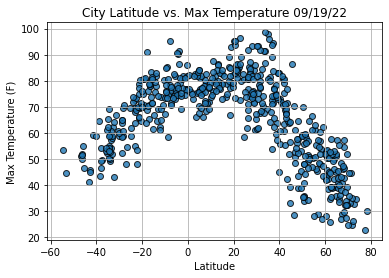

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# show plot
plt.show()



In [26]:
# 6.3.2
# Plot Latitude vs. Humidity

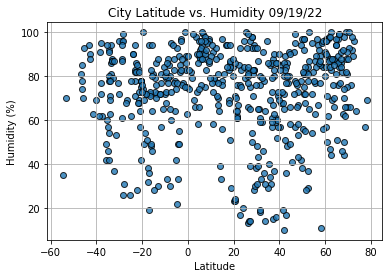

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.


In [28]:
# 6.3.3
# Plot Latitude vs. Cloudiness

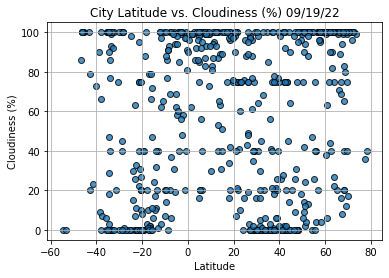

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.

# Show plot.
plt.show()


In [30]:
# 6.3.4
# Plot Latitude vs. Wind Speed

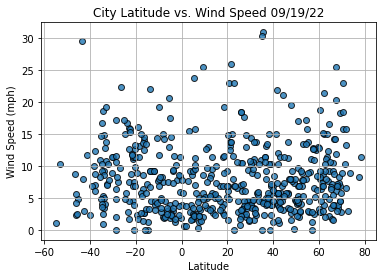

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [32]:
#############################

In [33]:
# 6.4.2
# Find the Correlation Between Latitude and Maximum Temperature

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [35]:
# Create the Hemisphere DataFrames

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lompoc,US,2022-09-19 21:32:36,34.6391,-120.4579,69.01,96,100,11.01
2,Nome,US,2022-09-19 21:30:51,64.5011,-165.4064,45.10,81,100,9.22
3,Inuvik,CA,2022-09-19 21:32:38,68.3499,-133.7218,54.36,50,20,6.91
4,Mbalmayo,CM,2022-09-19 21:32:38,3.5167,11.5000,66.09,98,92,2.86
6,Bafq,IR,2022-09-19 21:32:39,31.6128,55.4107,79.95,18,5,1.52
...,...,...,...,...,...,...,...,...,...
543,Kholtoson,RU,2022-09-19 21:36:38,50.2981,103.3097,35.44,82,6,4.63
544,Xiaoweizhai,CN,2022-09-19 21:36:38,26.1903,107.5125,70.97,84,89,3.13
545,Westport,US,2022-09-19 21:29:38,41.1415,-73.3579,81.75,73,0,14.97
546,Atar,MR,2022-09-19 21:36:39,20.5169,-13.0499,95.31,24,90,4.85


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [44]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
import scipy
from scipy.stats import linregress

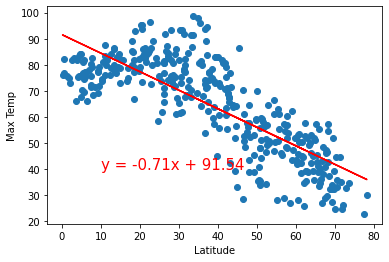

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

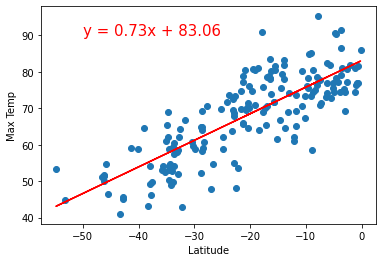

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [49]:
# 6.4.3
# Find the Correlation Between Latitude and Percent Humidity

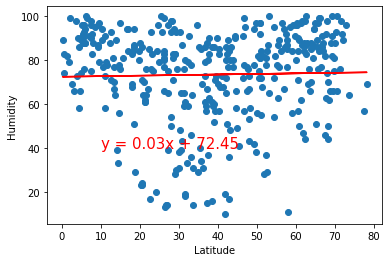

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(10,40))

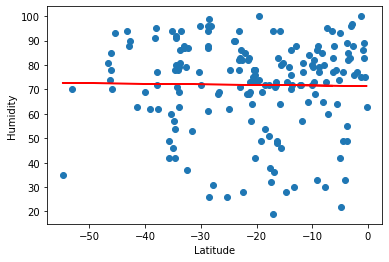

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]



# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(10,40))

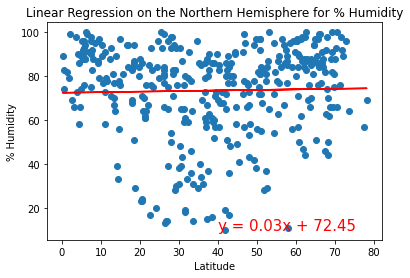

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [53]:
##########################

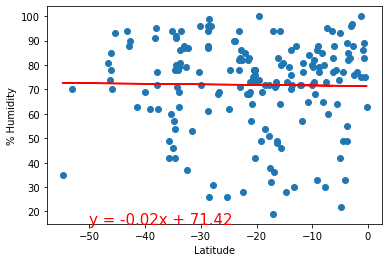

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


In [55]:
# 6.4.4
# Find the Correlation Between Latitude and Percent Cloudiness
